In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [83]:
dataset = pd.read_csv("data.csv")
dataset.head()

,Age,Estimated Salary,Purchase
0,56,28392,0
1,46,50535,1
2,32,98603,0
3,25,133569,0
4,38,72256,0


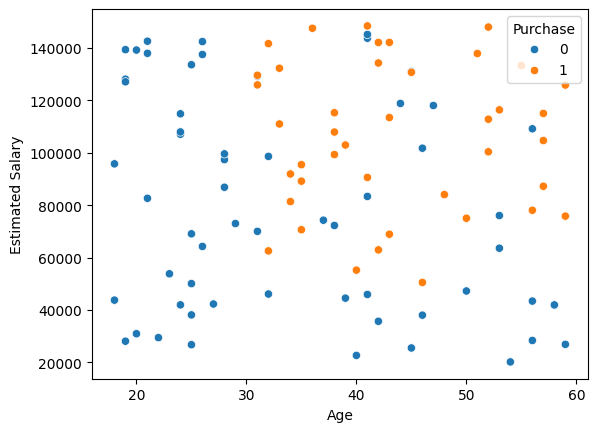

In [84]:
sns.scatterplot(x="Age",y="Estimated Salary",data=dataset,hue="Purchase")
plt.show()

In [85]:
x = dataset.iloc[:,:-1]
y = dataset["Purchase"]

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [88]:
x

,Age,Estimated Salary
0,1.487884,-1.607270
1,0.665394,-1.028861
2,-0.486092,0.226750
3,-1.061835,1.140116
4,0.007402,-0.461474
...,...,...
95,1.734631,0.937961
96,1.487884,-0.310048
97,1.652382,-1.252879
98,0.583145,-1.682030


In [89]:
from sklearn.model_selection import train_test_split

In [90]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [93]:
knn.score(x_test,y_test)*100

85.0

In [94]:
knn.score(x_train,y_train)*100

87.5

In [95]:
knn.predict([[-1.144084	,0.651303]])

c:\Users\vikas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [96]:
for i in range(1,30):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train,y_train)
    print(i,knn1.score(x_train,y_train)*100,knn1.score(x_test,y_test)*100)


1 100.0 70.0
2 85.0 80.0
3 88.75 80.0
4 87.5 80.0
5 87.5 85.0
6 87.5 70.0
7 86.25 80.0
8 82.5 70.0
9 85.0 75.0
10 81.25 70.0
11 83.75 80.0
12 82.5 80.0
13 82.5 80.0
14 81.25 80.0
15 82.5 80.0
16 81.25 80.0
17 82.5 80.0
18 82.5 75.0
19 83.75 80.0
20 83.75 75.0
21 83.75 75.0
22 82.5 75.0
23 81.25 75.0
24 82.5 70.0
25 81.25 75.0
26 81.25 70.0
27 82.5 75.0
28 81.25 75.0
29 81.25 75.0


c:\Users\vikas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


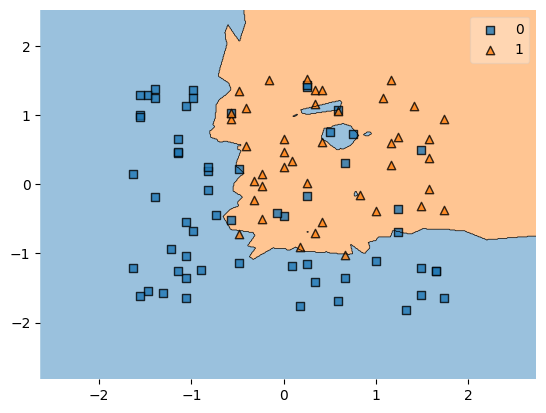

In [97]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=knn)
plt.show()